# Training a Sarcasm Detection Model using Bidirectional LSTMs


In [1]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2023-10-26 14:03:58--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.101.207, 2607:f8b0:4023:c06::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json.1’

sarcasm.json.1      100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2023-10-26 14:03:58 (86.9 MB/s) - ‘sarcasm.json.1’ saved [5643545/5643545]



In [2]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [3]:
training_size = 20000

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [4]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [5]:
import tensorflow as tf

# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 24

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 174129 (680.19 KB)
Trainable params: 174129 (680.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
NUM_EPOCHS = 10

# Train the model
history_lstm = model_lstm.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 59s 78ms/step - loss: 0.4090 - accuracy: 0.7963 - val_loss: 0.3335 - val_accuracy: 0.8548
Epoch 2/10
625/625 [==============================] - 44s 70ms/step - loss: 0.2226 - accuracy: 0.9091 - val_loss: 0.3524 - val_accuracy: 0.8533
Epoch 3/10
625/625 [==============================] - 47s 75ms/step - loss: 0.1567 - accuracy: 0.9388 - val_loss: 0.3919 - val_accuracy: 0.8465
Epoch 4/10
625/625 [==============================] - 43s 70ms/step - loss: 0.1175 - accuracy: 0.9567 - val_loss: 0.4639 - val_accuracy: 0.8416
Epoch 5/10
625/625 [==============================] - 45s 72ms/step - loss: 0.0808 - accuracy: 0.9722 - val_loss: 0.5665 - val_accuracy: 0.8350
Epoch 6/10
625/625 [==============================] - 44s 71ms/step - loss: 0.0547 - accuracy: 0.9820 - val_loss: 0.6264 - val_accuracy: 0.8359
Epoch 7/10
625/625 [==============================] - 47s 75ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.7676 - val_accuracy:

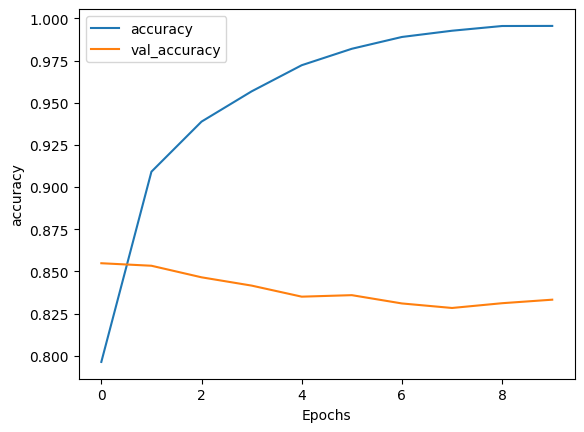

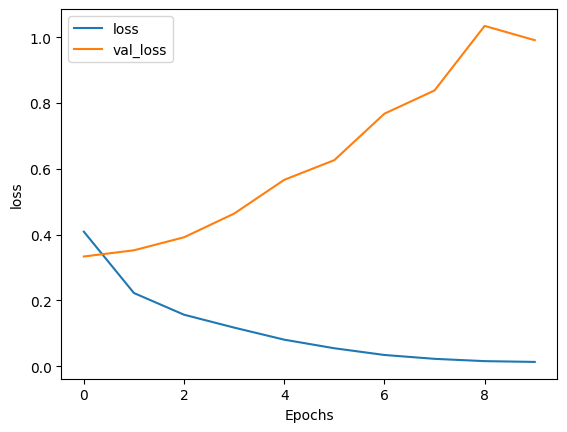

In [7]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

# Training a Sarcasm Detection Model using a Convolution Layer

In [8]:
# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171149 (668.55 KB)
Trainable params: 171149 (668.55 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [9]:
NUM_EPOCHS = 10

# Train the model
history_conv = model_conv.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 11s 16ms/step - loss: 0.4424 - accuracy: 0.7800 - val_loss: 0.3528 - val_accuracy: 0.8501
Epoch 2/10
625/625 [==============================] - 9s 15ms/step - loss: 0.2247 - accuracy: 0.9105 - val_loss: 0.3628 - val_accuracy: 0.8480
Epoch 3/10
625/625 [==============================] - 10s 16ms/step - loss: 0.1137 - accuracy: 0.9607 - val_loss: 0.4601 - val_accuracy: 0.8396
Epoch 4/10
625/625 [==============================] - 9s 14ms/step - loss: 0.0495 - accuracy: 0.9843 - val_loss: 0.5498 - val_accuracy: 0.8348
Epoch 5/10
625/625 [==============================] - 10s 15ms/step - loss: 0.0210 - accuracy: 0.9947 - val_loss: 0.6715 - val_accuracy: 0.8328
Epoch 6/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0094 - accuracy: 0.9977 - val_loss: 0.7617 - val_accuracy: 0.8331
Epoch 7/10
625/625 [==============================] - 9s 15ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.8490 - val_accuracy: 0.

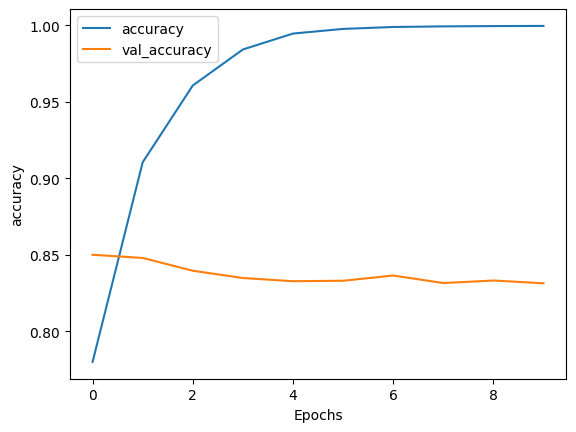

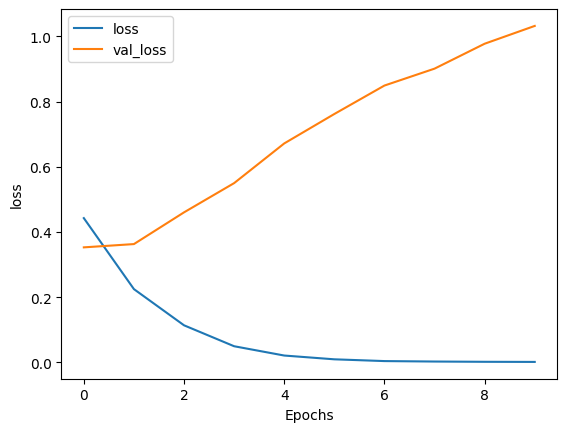

In [10]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')